### Проверить файл markup.tsv,найти и исправить все ошибки. Ошибки связаны с нарушением правил заполнения колонок.

Проверку файла, поиск и исправление ошибок провела с помощью кода, написанного на языке ***python***.

1.Импортируем файл .tsv с помощью pandas.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\user\\OneDrive\\Desktop\\Test task Immunoprofiling RnD_Anna_Gevorgyan\\Test task Immunoprofiling RnD_Anna_Gevorgyan\\markup.tsv",delimiter='\t',index_col=0)

In [3]:
df

,BG_population,BG_id,BG_marker
14,Monocytes,nk_cells-n9l0jxvsly,CD66B-_CCR3-_CD3-_CD56-_CD19-_CD14+_CD123-_CD11C-
31,B_cells,b_cells-9i3jc35u9w,CD66B-_CCR3-_CD3-_CD56-_CD19+_CD14-_CD123-_CD11C-
37,T_cells,t_cells-pkzdxv775a,CD66B-_CCR3-_CD3+_CD56-_CD19-_CD14-_CD123-_CD11C-
41,Neutrophils,neutrophils-hsirybk0lf,CD66B+_CCR3-_CD3-_CD56-_CD19-_CD14-_CD123-_CD11C-
89,B_cells,b_cells-9i3jc35u9w,CD66B-_CCR3-_CD3-_CD56-_CD19+_CD14-_CD123-_CD11C-
...,...,...,...
875075,B_cells,b_cells-9i3jc35u9w,CD66B-_CCR3-_CD3-_CD56-_CD19+_CD14-_CD123-_CD11C-
875117,Neutrophils,neutrophils-hsirybk0lf,CD66B+_CCR3-_CD3-_CD56-_CD19-_CD14-_CD123-_CD11C-
875142,Basophils,basophils-7v5sdc3crs,CD66B-_CCR3+_CD3-_CD56-_CD19-_CD14-_CD123-_CD11C-
875146,T_cells,t_cells-pkzdxv775a,CD66B-_CCR3-_CD3+_CD56-_CD19-_CD14-_CD123-_CD11C-


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 14 to 875180
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   BG_population  49990 non-null  object
 1   BG_id          49992 non-null  object
 2   BG_marker      49991 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


2.Используем библиотеку difflib для нахождения наилучших совпадений среди стандартных названий популяций.

In [5]:
from difflib import get_close_matches

In [6]:
# Стандартные названия клеточных популяций

In [7]:
standard_populations = ['Basophils', 'Eosinophils', 'Neutrophils', 'B_cells','T_cells','NK_cells', 'NKT_cells', 'Monocytes','cDC', 'Plasmacytoid_Dendritic_cells' ]

In [8]:
# Функция для поиска наилучшего совпадения среди стандартных названий 

In [9]:
def find_best_match(value):
    if pd.isna(value):
        return value
    matches = get_close_matches(value, standard_populations, n=1, cutoff=0.3)
    return matches[0] if matches else value

In [10]:
# Применение функции к колонке BG_population

In [11]:
df['BG_population'] = df['BG_population'].apply(find_best_match)

3.Нам нужно создать соответствие между значениями в колонке 'BG_id' и 'BG_population'.У нас есть заранее известные стандартные соответствия, мы можем использовать словарь для коррекции значений в колонке 'BG_id'. 

In [12]:
# Стандартные соответствия между BG_population и BG_id

In [13]:
standard_mappings = {
    'Basophils': 'basophils-7v5sdc3crs',
    'Eosinophils': 'eosinophils-yzol4xsbbt',
    'Neutrophils': 'neutrophils-hsirybk0lf',
    'B_cells': 'b_cells-9i3jc35u9w',
    'T_cells': 't_cells-pkzdxv775a',
    'NK_cells': 'nk_cells-n9l0jxvsly',
    'NKT_cells': 'nkt_cells-ajk3x5zk16',
    'Monocytes': 'monocytes-39824zcalf',
    'cDC': 'cdc-8in6fs9pt7',
    'Plasmacytoid_Dendritic_cells': 'pdc-yk0reef75t',
}


In [14]:
# Функция для исправления значений в колонке BG_id

In [15]:
def fix_bg_id(row):
    population = row['BG_population']
    if population in standard_mappings:
        return standard_mappings[population]
    else:
        return row['BG_id']

In [16]:
# Применение функции к колонке BG_id

In [17]:
df['BG_id'] = df.apply(fix_bg_id, axis=1)

In [18]:
standard_mappings = {
    'basophils-7v5sdc3crs': 'Basophils',
    'eosinophils-yzol4xsbbt': 'Eosinophils',
    'neutrophils-hsirybk0lf': 'Neutrophils',
    'b_cells-9i3jc35u9w': 'B_cells',
    't_cells-pkzdxv775a': 'T_cells',
    'nk_cells-n9l0jxvsly': 'NK_cells',
    'nkt_cells-ajk3x5zk16': 'NKT_cells',
    'monocytes-39824zcalf': 'Monocytes',
    'cdc-8in6fs9pt7': 'cDC',
    'pdc-yk0reef75t': 'Plasmacytoid_Dendritic_cells',
}

In [19]:
# Функция для исправления значений в колонке BG_population

In [20]:
def check_mapping(row):
    bg_id = row['BG_id']
    bg_population = standard_mappings.get(bg_id, None)
    return bg_population

In [21]:
# Применение функции к колонке BG_population

In [22]:
df['BG_population'] = df.apply(check_mapping, axis=1)

Нам известно, какие популяции лейкоцитов в крови определяются заданными нами маркерами.

In [23]:
# Стандартные соответствия между BG_population и BG_marker

In [24]:
standard_marker_mappings = {
    'Basophils': 'CD66B-_CCR3+_CD3-_CD56-_CD19-_CD14-_CD123-_CD11C-',
    'B_cells':  'CD66B-_CCR3-_CD3-_CD56-_CD19+_CD14-_CD123-_CD11C-',
    'Neutrophils': 'CD66B+_CCR3-_CD3-_CD56-_CD19-_CD14-_CD123-_CD11C-',
    'T_cells': 'CD66B-_CCR3-_CD3+_CD56-_CD19-_CD14-_CD123-_CD11C-',  
    'Monocytes': 'CD66B-_CCR3-_CD3-_CD56-_CD19-_CD14+_CD123-_CD11C-',
    'NK_cells': 'CD66B-_CCR3-_CD3-_CD56+_CD19-_CD14-_CD123-_CD11C-',
    'cDC': 'CD66B-_CCR3-_CD3-_CD56-_CD19-_CD14-_CD123-_CD11C+',
    'Plasmacytoid_Dendritic_cells': 'CD66B-_CCR3-_CD3-_CD56-_CD19-_CD14-_CD123+_CD11C-',
    'Eosinophils': 'CD66B+_CCR3+_CD3-_CD56-_CD19-_CD14-_CD123-_CD11C-',
    'NKT_cells': 'CD66B-_CCR3-_CD3+_CD56+_CD19-_CD14-_CD123-_CD11C-',
}

In [25]:
# Функция для исправления значений в колонке BG_marker

In [26]:
def fix_bg_marker(row):
    population = row['BG_population']
    if population in standard_marker_mappings:
        return standard_marker_mappings[population]
    else:
        return row['BG_marker']

In [27]:
# Применение функции к колонке BG_marker

In [28]:
df['BG_marker'] = df.apply(fix_bg_marker, axis=1)

In [29]:
# Сохранение исправленных данных обратно в файл

In [30]:
df.to_csv("C:\\Users\\user\\OneDrive\\Desktop\\Test task Immunoprofiling RnD_Anna_Gevorgyan\\Test task Immunoprofiling RnD_Anna_Gevorgyan\\markup.tsv",sep='\t',index=True)

In [31]:
df

,BG_population,BG_id,BG_marker
14,Monocytes,monocytes-39824zcalf,CD66B-_CCR3-_CD3-_CD56-_CD19-_CD14+_CD123-_CD11C-
31,B_cells,b_cells-9i3jc35u9w,CD66B-_CCR3-_CD3-_CD56-_CD19+_CD14-_CD123-_CD11C-
37,T_cells,t_cells-pkzdxv775a,CD66B-_CCR3-_CD3+_CD56-_CD19-_CD14-_CD123-_CD11C-
41,Neutrophils,neutrophils-hsirybk0lf,CD66B+_CCR3-_CD3-_CD56-_CD19-_CD14-_CD123-_CD11C-
89,B_cells,b_cells-9i3jc35u9w,CD66B-_CCR3-_CD3-_CD56-_CD19+_CD14-_CD123-_CD11C-
...,...,...,...
875075,B_cells,b_cells-9i3jc35u9w,CD66B-_CCR3-_CD3-_CD56-_CD19+_CD14-_CD123-_CD11C-
875117,Neutrophils,neutrophils-hsirybk0lf,CD66B+_CCR3-_CD3-_CD56-_CD19-_CD14-_CD123-_CD11C-
875142,Basophils,basophils-7v5sdc3crs,CD66B-_CCR3+_CD3-_CD56-_CD19-_CD14-_CD123-_CD11C-
875146,T_cells,t_cells-pkzdxv775a,CD66B-_CCR3-_CD3+_CD56-_CD19-_CD14-_CD123-_CD11C-


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 14 to 875180
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   BG_population  50000 non-null  object
 1   BG_id          50000 non-null  object
 2   BG_marker      50000 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


# t-SNE

In [33]:
import matplotlib.pyplot as plt

In [34]:
from sklearn.manifold import TSNE

In [35]:
data = pd.read_csv("C:\\Users\\user\\OneDrive\\Desktop\\Test task Immunoprofiling RnD_Anna_Gevorgyan\\Test task Immunoprofiling RnD_Anna_Gevorgyan\\data.tsv",delimiter='\t',index_col=0)

In [36]:
data

,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,CCR3,Viability,CD123,HLADR,CD3,CD45,CD14,CD13,CD66B,CD56,CD19,CD11C
14,0.350892,0.305854,1.096106,0.161331,0.125526,0.872856,-0.289276,2.530298,-1.321726,3.697845,-1.159602,4.341811,5.049473,4.141195,2.115114,0.003684,0.185527,4.323541
31,0.484180,0.466672,0.874537,0.088738,0.091095,0.547934,-1.377160,0.649953,0.416085,3.983262,1.982131,4.316047,0.021556,-0.765338,0.005843,-0.281910,2.758489,-0.896323
37,1.130556,1.058735,1.135036,0.203863,0.189416,0.699579,-2.267303,1.094266,-0.674774,4.737902,4.654281,5.619707,0.551440,-0.965823,-0.727975,-0.434279,0.437730,-0.465053
41,1.731011,1.534464,1.308000,1.433218,1.209570,0.966556,1.024380,1.478631,-0.022085,-0.579028,-0.681029,2.497834,1.228605,3.317016,3.847465,0.395206,1.204629,3.511772
89,0.632675,0.601362,1.051389,0.074374,0.073434,0.550136,-1.347175,0.244521,-0.265142,3.644648,0.041939,4.356508,-0.256804,-0.290681,0.308234,-0.517006,2.341677,-0.287490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875075,0.408404,0.394057,0.855822,0.078633,0.078429,0.546936,-0.654227,0.078444,-0.011513,3.686374,1.345838,4.534161,-1.005372,-0.140573,1.509731,-0.144109,2.778678,-1.222435
875117,1.901559,1.590129,1.559748,1.474618,1.169707,1.039287,1.738660,1.362468,-0.848748,0.163285,0.161141,3.015510,1.364135,3.746954,4.290867,-0.728945,0.423074,3.659070
875142,0.593250,0.569829,1.012568,0.137382,0.135112,0.616260,2.629307,0.935827,3.606306,1.226899,0.668472,3.929902,-0.230628,3.793061,-0.597683,0.791666,-0.049761,2.951520
875146,0.990532,0.951363,1.049108,0.130349,0.126163,0.628682,-2.493391,0.706607,-0.262325,4.171019,4.428697,5.562962,1.074205,-0.041123,-0.641141,-0.869719,-0.520551,-1.136267


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 14 to 875180
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FSC-A      50000 non-null  float64
 1   FSC-H      50000 non-null  float64
 2   FSC-W      50000 non-null  float64
 3   SSC-A      50000 non-null  float64
 4   SSC-H      50000 non-null  float64
 5   SSC-W      50000 non-null  float64
 6   CCR3       50000 non-null  float64
 7   Viability  50000 non-null  float64
 8   CD123      50000 non-null  float64
 9   HLADR      50000 non-null  float64
 10  CD3        50000 non-null  float64
 11  CD45       50000 non-null  float64
 12  CD14       50000 non-null  float64
 13  CD13       50000 non-null  float64
 14  CD66B      50000 non-null  float64
 15  CD56       50000 non-null  float64
 16  CD19       50000 non-null  float64
 17  CD11C      50000 non-null  float64
dtypes: float64(18)
memory usage: 7.2 MB


In [38]:
data['Population'] = df['BG_population']

In [39]:
data

,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,CCR3,Viability,CD123,HLADR,CD3,CD45,CD14,CD13,CD66B,CD56,CD19,CD11C,Population
14,0.350892,0.305854,1.096106,0.161331,0.125526,0.872856,-0.289276,2.530298,-1.321726,3.697845,-1.159602,4.341811,5.049473,4.141195,2.115114,0.003684,0.185527,4.323541,Monocytes
31,0.484180,0.466672,0.874537,0.088738,0.091095,0.547934,-1.377160,0.649953,0.416085,3.983262,1.982131,4.316047,0.021556,-0.765338,0.005843,-0.281910,2.758489,-0.896323,B_cells
37,1.130556,1.058735,1.135036,0.203863,0.189416,0.699579,-2.267303,1.094266,-0.674774,4.737902,4.654281,5.619707,0.551440,-0.965823,-0.727975,-0.434279,0.437730,-0.465053,T_cells
41,1.731011,1.534464,1.308000,1.433218,1.209570,0.966556,1.024380,1.478631,-0.022085,-0.579028,-0.681029,2.497834,1.228605,3.317016,3.847465,0.395206,1.204629,3.511772,Neutrophils
89,0.632675,0.601362,1.051389,0.074374,0.073434,0.550136,-1.347175,0.244521,-0.265142,3.644648,0.041939,4.356508,-0.256804,-0.290681,0.308234,-0.517006,2.341677,-0.287490,B_cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875075,0.408404,0.394057,0.855822,0.078633,0.078429,0.546936,-0.654227,0.078444,-0.011513,3.686374,1.345838,4.534161,-1.005372,-0.140573,1.509731,-0.144109,2.778678,-1.222435,B_cells
875117,1.901559,1.590129,1.559748,1.474618,1.169707,1.039287,1.738660,1.362468,-0.848748,0.163285,0.161141,3.015510,1.364135,3.746954,4.290867,-0.728945,0.423074,3.659070,Neutrophils
875142,0.593250,0.569829,1.012568,0.137382,0.135112,0.616260,2.629307,0.935827,3.606306,1.226899,0.668472,3.929902,-0.230628,3.793061,-0.597683,0.791666,-0.049761,2.951520,Basophils
875146,0.990532,0.951363,1.049108,0.130349,0.126163,0.628682,-2.493391,0.706607,-0.262325,4.171019,4.428697,5.562962,1.074205,-0.041123,-0.641141,-0.869719,-0.520551,-1.136267,T_cells


In [40]:
tsne = TSNE(n_components=2,learning_rate=4000, random_state=42)
tsne_result = tsne.fit_transform(data.iloc[:, 0:18])

In [41]:
pd.DataFrame(tsne_result)

,0,1
0,-38.677868,-83.792938
1,79.782822,-10.182044
2,63.152256,55.128025
3,-37.434513,34.779369
4,50.876694,-35.807991
...,...,...
49995,55.540943,-6.728059
49996,-64.863922,-7.470009
49997,-24.931768,96.685623
49998,64.608604,63.372894


In [42]:
# Создание словаря цветов для каждой популяции

In [43]:
color_dict = {
    'Neutrophils': 'gainsboro',
    'B_cells': 'deeppink',
    'T_cells': 'yellow',
    'NK_cells': 'pink',
    'Monocytes': 'cyan',
    'Basophils': 'forestgreen',
    'Eosinophils': 'navy',
    'NKT_cells': 'maroon',
    'cDC': 'DarkOrange',
    'Plasmacytoid_Dendritic_cells': 'black'
}

In [44]:
data.reset_index(drop=True, inplace=True)

In [45]:
# Создание графика t-SNE

In [46]:
data

,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,CCR3,Viability,CD123,HLADR,CD3,CD45,CD14,CD13,CD66B,CD56,CD19,CD11C,Population
0,0.350892,0.305854,1.096106,0.161331,0.125526,0.872856,-0.289276,2.530298,-1.321726,3.697845,-1.159602,4.341811,5.049473,4.141195,2.115114,0.003684,0.185527,4.323541,Monocytes
1,0.484180,0.466672,0.874537,0.088738,0.091095,0.547934,-1.377160,0.649953,0.416085,3.983262,1.982131,4.316047,0.021556,-0.765338,0.005843,-0.281910,2.758489,-0.896323,B_cells
2,1.130556,1.058735,1.135036,0.203863,0.189416,0.699579,-2.267303,1.094266,-0.674774,4.737902,4.654281,5.619707,0.551440,-0.965823,-0.727975,-0.434279,0.437730,-0.465053,T_cells
3,1.731011,1.534464,1.308000,1.433218,1.209570,0.966556,1.024380,1.478631,-0.022085,-0.579028,-0.681029,2.497834,1.228605,3.317016,3.847465,0.395206,1.204629,3.511772,Neutrophils
4,0.632675,0.601362,1.051389,0.074374,0.073434,0.550136,-1.347175,0.244521,-0.265142,3.644648,0.041939,4.356508,-0.256804,-0.290681,0.308234,-0.517006,2.341677,-0.287490,B_cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.408404,0.394057,0.855822,0.078633,0.078429,0.546936,-0.654227,0.078444,-0.011513,3.686374,1.345838,4.534161,-1.005372,-0.140573,1.509731,-0.144109,2.778678,-1.222435,B_cells
49996,1.901559,1.590129,1.559748,1.474618,1.169707,1.039287,1.738660,1.362468,-0.848748,0.163285,0.161141,3.015510,1.364135,3.746954,4.290867,-0.728945,0.423074,3.659070,Neutrophils
49997,0.593250,0.569829,1.012568,0.137382,0.135112,0.616260,2.629307,0.935827,3.606306,1.226899,0.668472,3.929902,-0.230628,3.793061,-0.597683,0.791666,-0.049761,2.951520,Basophils
49998,0.990532,0.951363,1.049108,0.130349,0.126163,0.628682,-2.493391,0.706607,-0.262325,4.171019,4.428697,5.562962,1.074205,-0.041123,-0.641141,-0.869719,-0.520551,-1.136267,T_cells


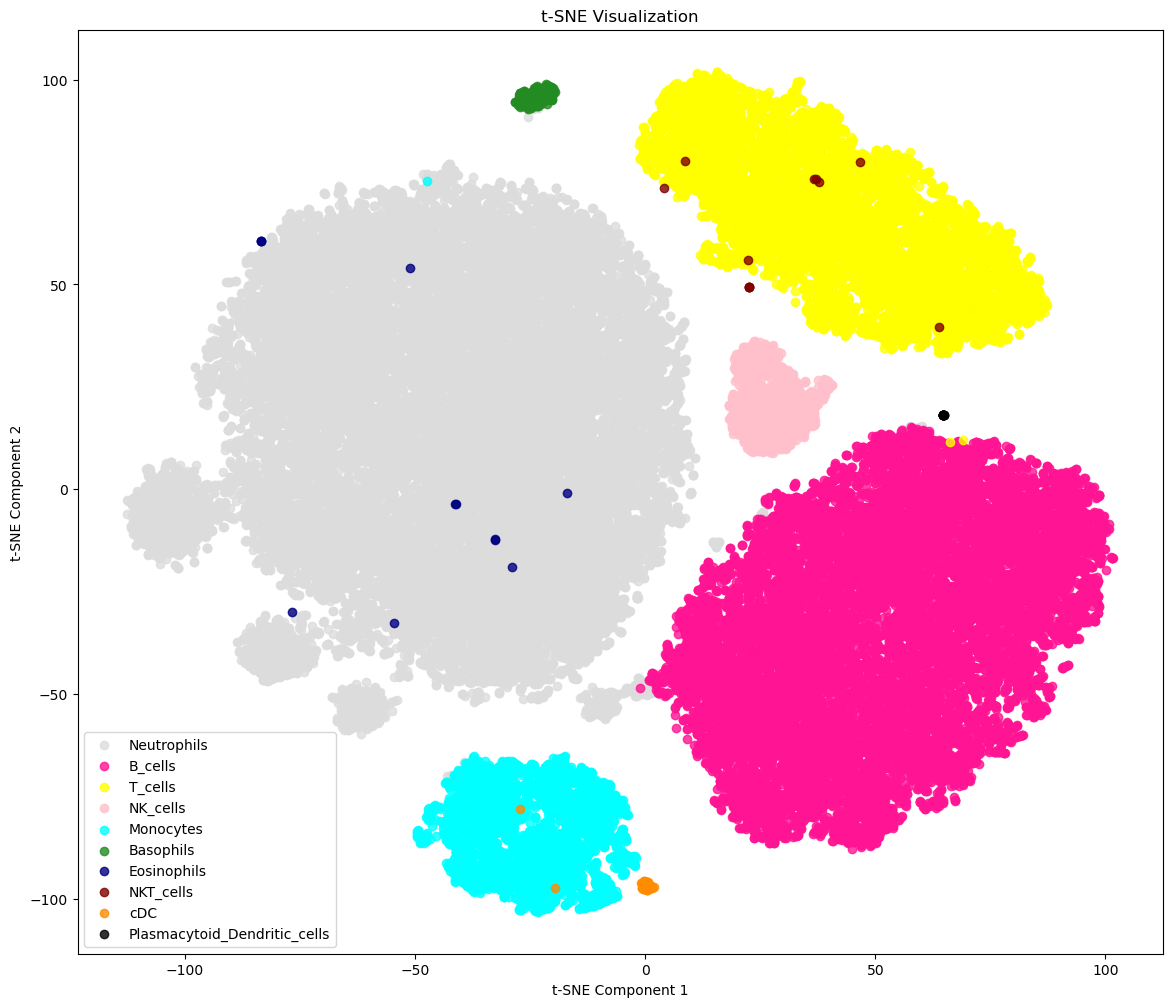

In [47]:
plt.figure(figsize=(14, 12))
for pop, color in color_dict.items():
    indices = data[data.iloc[:, -1] == pop].index
    plt.scatter(tsne_result[indices, 0], tsne_result[indices, 1], label=pop, color=color, alpha=0.8)

plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

In [48]:
df

,BG_population,BG_id,BG_marker
14,Monocytes,monocytes-39824zcalf,CD66B-_CCR3-_CD3-_CD56-_CD19-_CD14+_CD123-_CD11C-
31,B_cells,b_cells-9i3jc35u9w,CD66B-_CCR3-_CD3-_CD56-_CD19+_CD14-_CD123-_CD11C-
37,T_cells,t_cells-pkzdxv775a,CD66B-_CCR3-_CD3+_CD56-_CD19-_CD14-_CD123-_CD11C-
41,Neutrophils,neutrophils-hsirybk0lf,CD66B+_CCR3-_CD3-_CD56-_CD19-_CD14-_CD123-_CD11C-
89,B_cells,b_cells-9i3jc35u9w,CD66B-_CCR3-_CD3-_CD56-_CD19+_CD14-_CD123-_CD11C-
...,...,...,...
875075,B_cells,b_cells-9i3jc35u9w,CD66B-_CCR3-_CD3-_CD56-_CD19+_CD14-_CD123-_CD11C-
875117,Neutrophils,neutrophils-hsirybk0lf,CD66B+_CCR3-_CD3-_CD56-_CD19-_CD14-_CD123-_CD11C-
875142,Basophils,basophils-7v5sdc3crs,CD66B-_CCR3+_CD3-_CD56-_CD19-_CD14-_CD123-_CD11C-
875146,T_cells,t_cells-pkzdxv775a,CD66B-_CCR3-_CD3+_CD56-_CD19-_CD14-_CD123-_CD11C-
